# Nội dung:
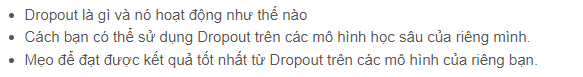

# Dropout
-dropout là một kỹ thuật mà các tế bào thần kinh được lựa chọn ngẫu nhiên bị bỏ qua trong quá trình đào tạo. Họ bị "bỏ rơi" một cách ngẫu nhiên. Điều này có nghĩa là sự đóng góp của chúng vào việc kích hoạt các nơ-ron xuôi dòng sẽ bị loại bỏ tạm thời trên đường chuyển tiếp và bất kỳ cập nhật trọng lượng nào không được áp dụng cho tế bào thần kinh trên đường truyền lùi.

## tại sao phải dropout?
-vì tà cần tránh và giảm thiểu quá trình Over-fiting
-mặt khác khi chúng ta sử dụng full-connected layer,các neural sẽ phụ thuộc mạnh lẫn nhau trong suốt quá trình,điều này làm giảm sức mạnh của các neural qua đó bị over-fitting tập train

# cách hoạt động của dropout:
Trong pha train: với mỗi hidden layer, với mỗi trainning sample, với mỗi lần lặp, chọn ngẫu nhiên p phần trăm số node và bỏ qua nó (bỏ qua luôn hàm kích hoạt cho các node bị bỏ qua).

Trong pha test: Sử dụng toàn bộ activations, nhưng giảm chúng với tỷ lệ p (do chúng ta bị miss p% hàm activation trong quá trình train).

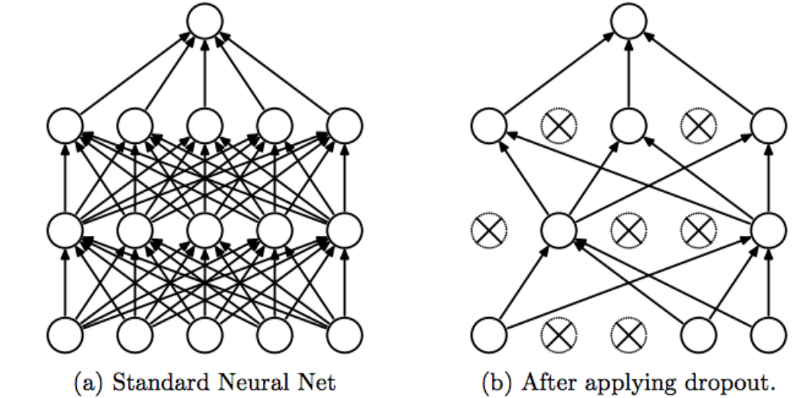

# khi chưa sử dụng dropout

In [2]:
# Baseline Model on the Sonar Dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu'))
	model.add(Dense(30,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.55% (6.11%)


# sử dụng dropout trong các lớp hiển thị

In [3]:
# Example of Dropout on the Sonar Dataset: Visible Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 85.55% (5.31%)


# sử dụng dropout trong các lớp ẩn

In [1]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Hidden: 82.67% (6.53%)


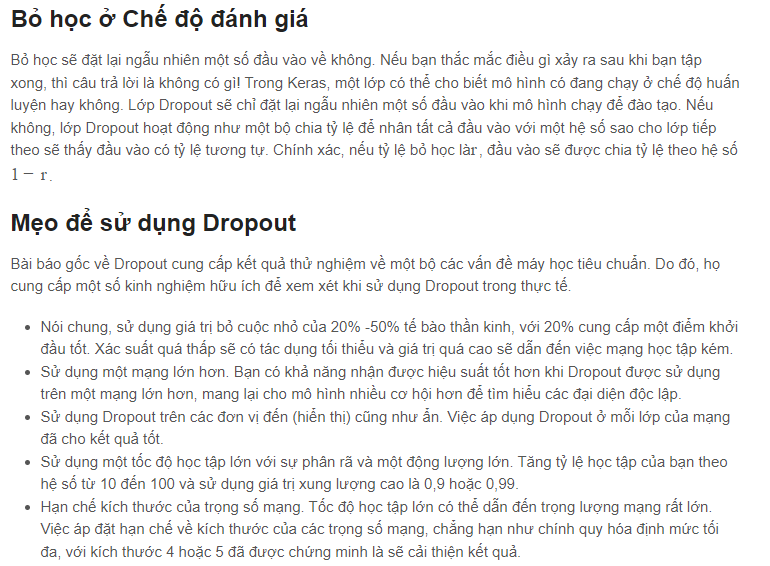